In [7]:
import sys
sys.path.append('/Users/dmitry/Desktop/Thesis/Libs')

In [13]:
import tensorflow as tf

from scenarios import run_AL
from queries import query_default, query_entropy
from models import create_sequential_model
from reshapes import reshape_mnist
from scores import score_sequential
from encoders import get_mnist_encoder, get_fmnist_encoder

## MNIST

In [14]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], 28, 28, 1)
x_test_mnist = x_test_mnist.reshape(x_test_mnist.shape[0], 28, 28, 1)
x_train_mnist = x_train_mnist.astype('float32')
x_test_mnist = x_test_mnist.astype('float32')
x_train_mnist /= 255
x_test_mnist /= 255

In [ ]:
mnist_init_size_stat = {}
mnist_init_size_stat['random'] = {}
mnist_init_size_stat['entropy'] = {}
for init_size in range(500, 2510, 500):
    mnist_init_size_stat['random'][init_size] = []
    mnist_init_size_stat['entropy'][init_size] = []
    for i in range(5):
        random_mnist = run_AL(query_default, create_sequential_model, reshape_mnist, score_sequential, 
                    x_train_mnist, 
                    y_train_mnist, 
                    x_test_mnist, 
                    y_test_mnist,
                    init_size, 1, 10000, 130, i)
        mnist_init_size_stat['random'][init_size].append(random_mnist)
        entropy_mnist = run_AL(query_entropy, create_sequential_model, reshape_mnist, score_sequential, 
                    x_train_mnist, 
                    y_train_mnist, 
                    x_test_mnist, 
                    y_test_mnist,
                    init_size, 1, 10000, 130, i)
        mnist_init_size_stat['entropy'][init_size].append(entropy_mnist)


In [17]:
import pickle

with open('mnist_init_size_stat.pkl', 'wb') as f:
    pickle.dump(mnist_init_size_stat, f)

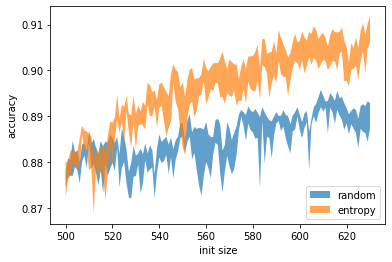

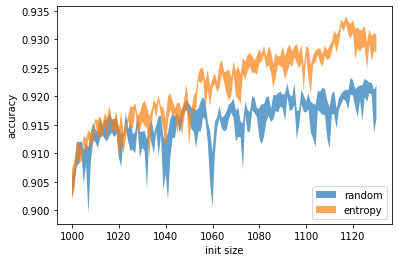

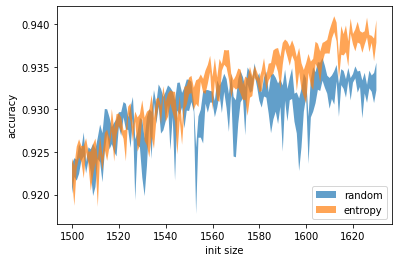

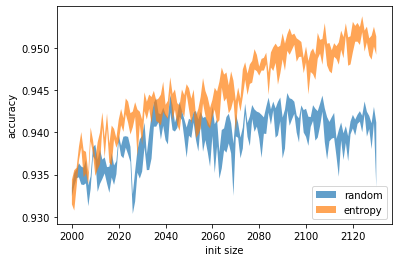

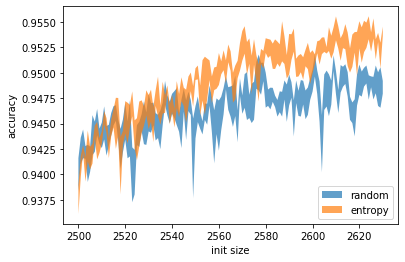

In [19]:
from plots import plot_conf_int
import matplotlib.pyplot as plt
for init_size in range(500, 2510, 500):
    plot_conf_int(mnist_init_size_stat['random'][init_size], 'random')
    plot_conf_int(mnist_init_size_stat['entropy'][init_size], 'entropy')
    plt.xlabel('init size')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.show()

## FMNIST

In [20]:
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = tf.keras.datasets.fashion_mnist.load_data()
x_train_fmnist = x_train_fmnist.reshape(x_train_fmnist.shape[0], 28, 28, 1)
x_test_fmnist = x_test_fmnist.reshape(x_test_fmnist.shape[0], 28, 28, 1)
x_train_fmnist = x_train_fmnist.astype('float32')
x_test_fmnist = x_test_fmnist.astype('float32')
x_train_fmnist /= 255
x_test_fmnist /= 255

In [ ]:
fmnist_init_size_stat = {}
fmnist_init_size_stat['random'] = {}
fmnist_init_size_stat['entropy'] = {}
for init_size in range(500, 2510, 500):
    fmnist_init_size_stat['random'][init_size] = []
    fmnist_init_size_stat['entropy'][init_size] = []
    for i in range(5):
        random_fmnist = run_AL(query_default, create_sequential_model, reshape_mnist, score_sequential, 
                    x_train_fmnist, 
                    y_train_fmnist, 
                    x_test_fmnist, 
                    y_test_fmnist,
                    init_size, 1, 10000, 130, i)
        fmnist_init_size_stat['random'][init_size].append(random_fmnist)
        entropy_fmnist = run_AL(query_entropy, create_sequential_model, reshape_mnist, score_sequential, 
                    x_train_fmnist, 
                    y_train_fmnist, 
                    x_test_fmnist, 
                    y_test_fmnist,
                    init_size, 1, 10000, 130, i)
        fmnist_init_size_stat['entropy'][init_size].append(entropy_fmnist)

run AL


In [ ]:
import pickle

with open('fmnist_init_size_stat.pkl', 'wb') as f:
    pickle.dump(fmnist_init_size_stat, f)

In [ ]:
from plots import plot_conf_int
for init_size in range(500, 2510, 500):
    plot_conf_int(fmnist_init_size_stat['random'][init_size], 'random')
    plot_conf_int(fmnist_init_size_stat['entropy'][init_size], 'entropy')
    plt.xlabel('init size')
    plt.ylabel('accuracy')
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
|